In [106]:
import pandas as pd
import numpy as np

In [107]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [108]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [109]:
import seaborn as sbn
import matplotlib.pyplot as plt

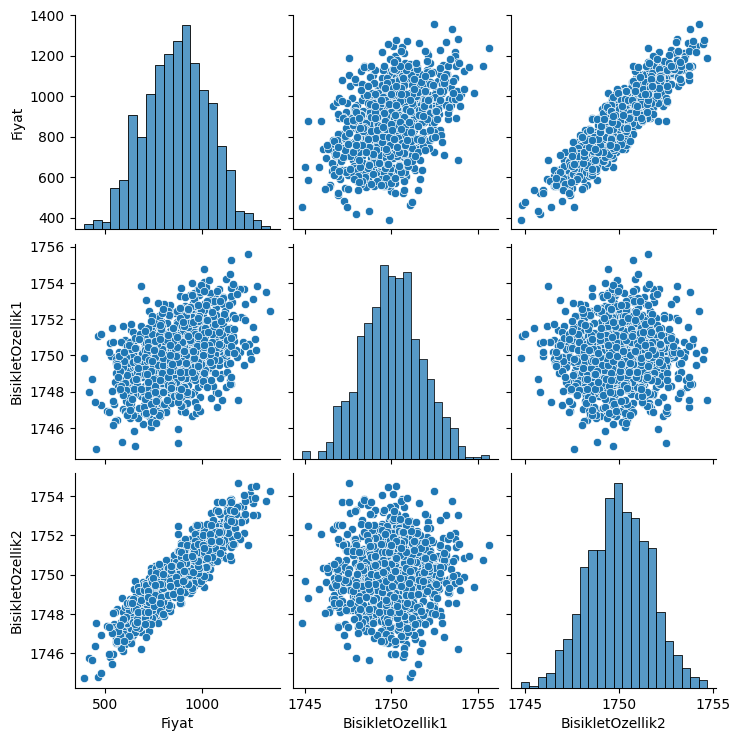

In [110]:
sbn.pairplot(dataFrame)

veriyi test/train olarak ikiye ayırmak

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [113]:
#test_size: verinin yüzde kaçını test için ayrılacağı
#random_state test ve train değeri yazarsak her seferinde aynı verileri elde ederiz

In [114]:
#y = ax+b
#y: label
#x: future

In [115]:
y = dataFrame["Fiyat"].values #numpy dizisine çevrildi

In [116]:
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [118]:
x_train.shape #670 veri traine geldi, 2 özellikli matris

(670, 2)

In [119]:
x_test.shape

(330, 2)

In [120]:
y_train.shape

(670,)

In [121]:
y_test.shape

(330,)

In [122]:
#scaling : verinin boyutunu küçültmek , tüm veriler 0-1 arasına yuvarlanır

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaler = MinMaxScaler()

In [125]:
scaler.fit(x_train) 
scaler.fit(x_test) 

MinMaxScaler()

In [126]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [127]:
x_train

array([[0.38400926, 0.68140096],
       [0.73357072, 0.93832587],
       [0.64052957, 0.12627506],
       ...,
       [0.28846494, 0.56234508],
       [0.89296342, 0.22149127],
       [0.51302427, 0.19475089]])

In [128]:
import tensorflow as tf

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#sequential model oluşturmak içindir
#dense katmanları oluştururken kullanılır

In [130]:
model = Sequential()

In [131]:
#hidden layers
model.add(Dense(4,activation="relu")) #4 nöron sayısı
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

#çıktı katmanı
model.add(Dense(1))

In [132]:
model.compile(optimizer="rmsprop",loss="mse")
#optimizasyon algoritması cost function yazar işlemler birleştirilir
#mse regression : regresyon çizgilerinin nasıl uyduğunu gösteren hata birimi

In [133]:
model.fit(x_train,y_train,epochs = 250) #x_traini y_train ile eğitiyoruz
#epochs kaç kere döndüğünü gösterir

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 804271.0625
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 792298.4375 
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 788520.3125 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 785246.4375 
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 787089.4375
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 811636.3125
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 793799.4375
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 798873.2500
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 795321.3125
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 790638.8125
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 794456.3125 
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 781679.8125
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 801761.3750
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step

In [134]:
model.history.history
#modelsın değerleri dictionary tipiyle

{'loss': [795901.6875,
  795860.375,
  795823.3125,
  795786.4375,
  795749.625,
  795713.0625,
  795676.125,
  795639.1875,
  795602.4375,
  795565.5625,
  795528.8125,
  795492.0,
  795455.3125,
  795418.5,
  795381.625,
  795344.9375,
  795308.0625,
  795271.1875,
  795234.375,
  795197.625,
  795160.875,
  795124.0625,
  795087.1875,
  795050.5,
  795013.6875,
  794976.75,
  794940.0625,
  794903.4375,
  794866.5625,
  794829.6875,
  794793.0,
  794756.1875,
  794719.3125,
  794682.5,
  794645.75,
  794609.0,
  794572.1875,
  794535.375,
  794498.5625,
  794461.875,
  794425.0625,
  794388.4375,
  794351.5,
  794314.8125,
  794278.0,
  794241.3125,
  794204.4375,
  794167.5625,
  794130.9375,
  794094.0625,
  794057.375,
  794020.6875,
  793983.875,
  793947.0625,
  793910.1875,
  793873.5,
  793836.875,
  793800.1875,
  793763.125,
  793726.375,
  793689.8125,
  793653.1875,
  793616.5,
  793579.5,
  793542.8125,
  793505.9375,
  793469.25,
  793432.5,
  793395.75,
  793358.9375,


In [135]:
loss = model.history.history["loss"]

<Axes: >

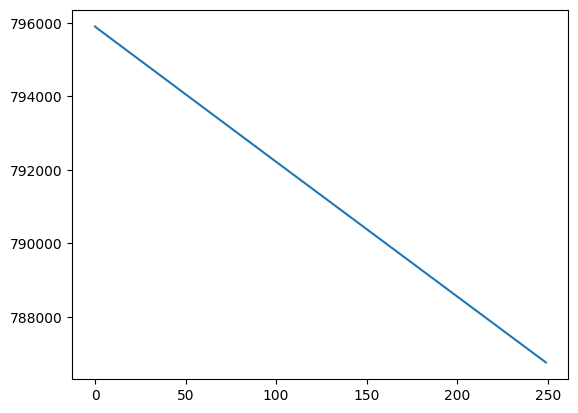

In [136]:
sbn.lineplot(x=range(len(loss)),y = loss)

In [137]:
model.evaluate(x_train,y_train)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 793817.8750


786738.75

In [138]:
trainLoss = model.evaluate(x_train,y_train,verbose = 0)
trainLoss

786738.75

In [139]:
testLoss = model.evaluate(x_test,y_test,verbose=1)
testLoss

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 764142.6875


764289.375

In [140]:
testTahminleri = model.predict(x_test)
testTahminleri

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.255975],
       [5.25

In [141]:
tahminDf = pd.DataFrame(y_test,columns = ["gerçek y"])
tahminDf

,gerçek y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [142]:
#testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [143]:
testTahminleri = np.array(testTahminleri).reshape(330,)
testTahminleri = pd.Series(testTahminleri)
testTahminleri

0      5.255975
1      5.255975
2      5.255975
3      5.255975
4      5.255975
         ...   
325    5.255975
326    5.255975
327    5.255975
328    5.255975
329    5.255975
Length: 330, dtype: float32

In [144]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)
tahminDf

,gerçek y,0
0,1081.652164,5.255975
1,622.675990,5.255975
2,889.356810,5.255975
3,902.826733,5.255975
4,897.662404,5.255975
...,...,...
325,1028.438035,5.255975
326,789.934950,5.255975
327,758.490486,5.255975
328,1172.871659,5.255975


In [145]:
tahminDf.columns = ["gerçek y","tahmin y"]
tahminDf

,gerçek y,tahmin y
0,1081.652164,5.255975
1,622.675990,5.255975
2,889.356810,5.255975
3,902.826733,5.255975
4,897.662404,5.255975
...,...,...
325,1028.438035,5.255975
326,789.934950,5.255975
327,758.490486,5.255975
328,1172.871659,5.255975


<Axes: xlabel='gerçek y', ylabel='tahmin y'>

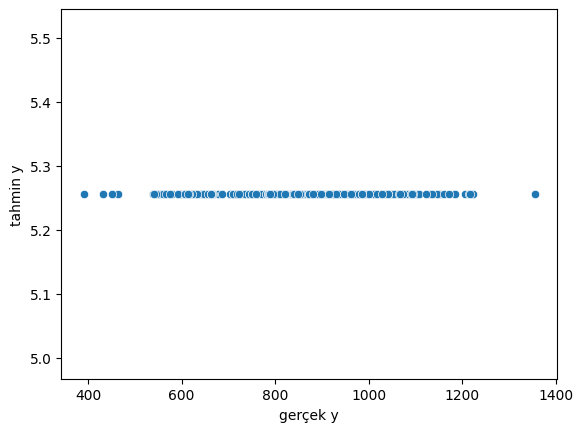

In [146]:
sbn.scatterplot(x = "gerçek y",y="tahmin y",data = tahminDf)

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [148]:
mean_absolute_error(tahminDf["gerçek y"],tahminDf["tahmin y"])

858.6397600867713

In [149]:
mean_squared_error(tahminDf["gerçek y"],tahminDf["tahmin y"])

764289.4227945987

In [151]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [156]:
yeniBisikletOzellikleri = [[1753,1758]]

In [157]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [158]:
model.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[5.255975]], dtype=float32)

In [159]:
from tensorflow.keras.models import load_model #modeli kayıt etmek

In [162]:
model.save("bisiklet_modeli.keras")

In [163]:
sonradanCagrilanModel = load_model("bisiklet_modeli.keras")

In [164]:
sonradanCagrilanModel.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


array([[5.255975]], dtype=float32)